In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install pingouin
import pingouin as pg
import warnings
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [4]:
data

Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
pg.linear_regression(data[['radio', 'newspaper','TV']], data['sales'])

names      coef        se          T          pval        r2    adj_r2  \
0  Intercept  2.938889  0.311908   9.422288  1.267295e-17  0.897211  0.895637   
1      radio  0.188530  0.008611  21.893496  1.505339e-54  0.897211  0.895637   
2  newspaper -0.001037  0.005871  -0.176715  8.599151e-01  0.897211  0.895637   
3         TV  0.045765  0.001395  32.808624  1.509960e-81  0.897211  0.895637   

   CI[2.5%]  CI[97.5%]  
0  2.323762   3.554016  
1  0.171547   0.205513  
2 -0.012616   0.010541  
3  0.043014   0.048516

DROPPING NEWSPAPER AS IT IS NOT SO SIGNIFICANT

# Univariate Analysis

<AxesSubplot:xlabel='sales', ylabel='Density'>

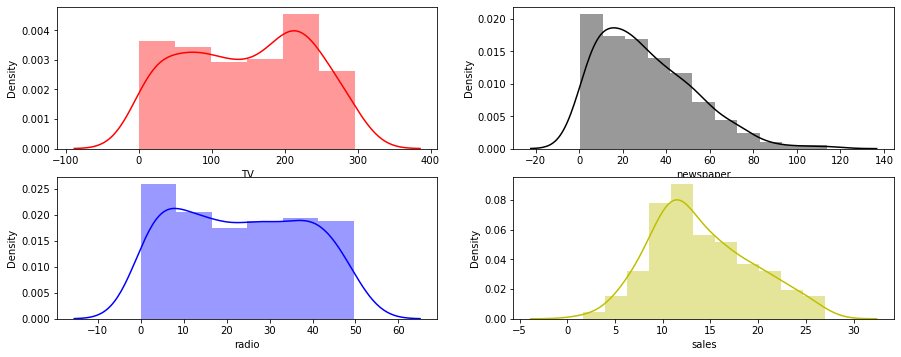

In [10]:
plt.figure(figsize=(15,12))
plt.subplot(4,2,1)
sns.distplot(data.TV,kde=True,color='r')
plt.subplot(4,2,2)
sns.distplot(data.newspaper,kde=True,color='black')
plt.subplot(4,2,3)
sns.distplot(data.radio,kde=True,color='blue')
plt.subplot(4,2,4)
sns.distplot(data.sales,kde=True,color='y')

# Observation
1-sales:normally distributed

2-newspaper:right skewed

3-tv: badly distributed

4-radio:badly distributed

# Bivariate Analysis

Text(0.5, 1.0, 'Sales VS RADIO')

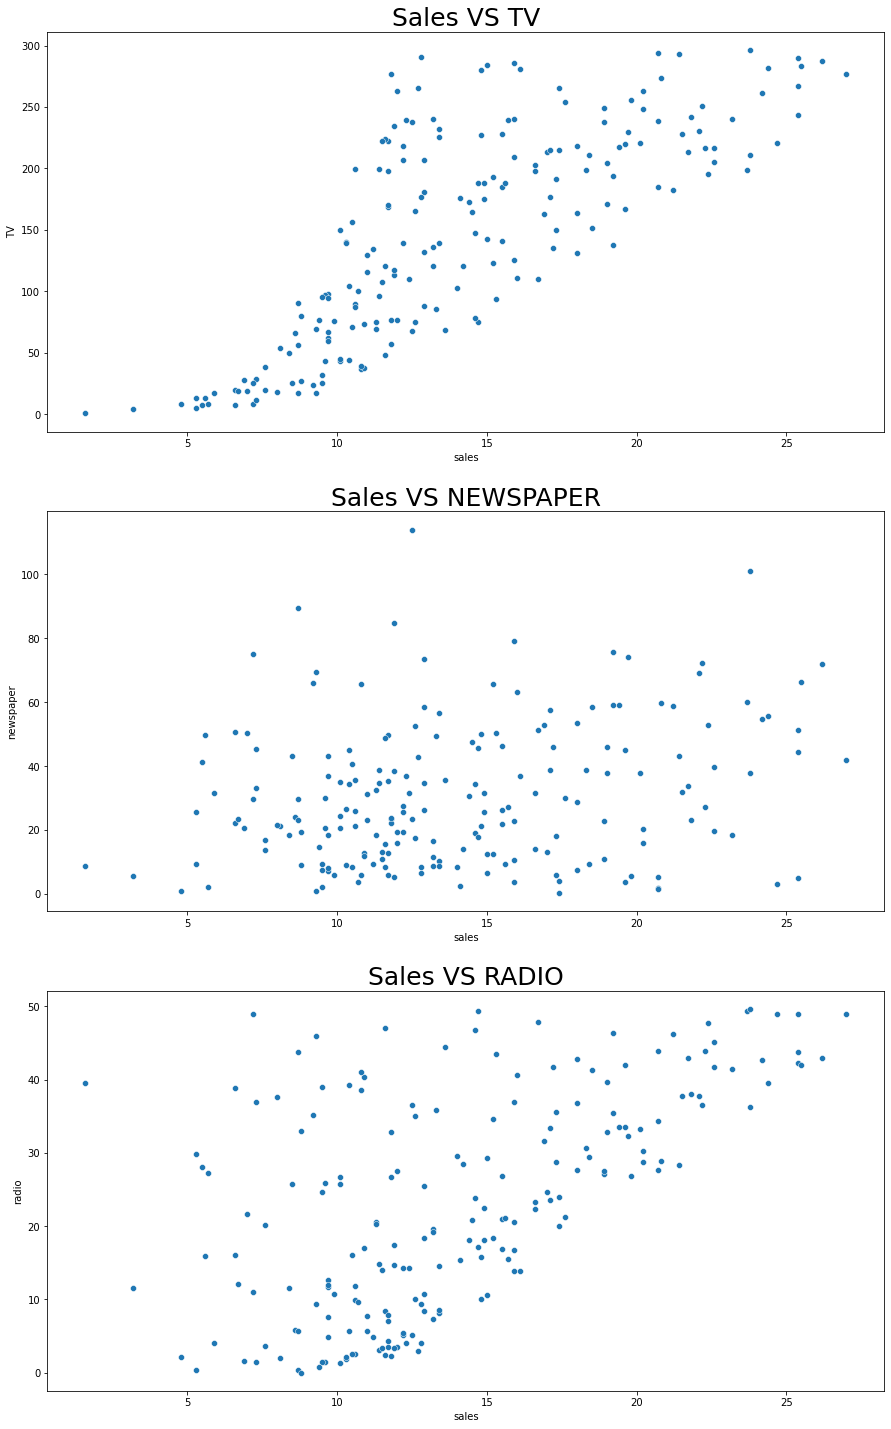

In [11]:
plt.figure(figsize=(15,25))
plt.subplot(3,1,1)
sns.scatterplot(x='sales',y='TV',data=data)
plt.title("Sales VS TV",fontsize=25)
plt.subplot(3,1,2)
sns.scatterplot(x='sales',y='newspaper',data=data)
plt.title("Sales VS NEWSPAPER",fontsize=25)
plt.subplot(3,1,3)
sns.scatterplot(x='sales',y='radio',data=data)
plt.title("Sales VS RADIO",fontsize=25)

Radio and TV has good relationship with sales.

Text(0.5, 1.0, 'SALES QQPLOT')

<Figure size 1080x1800 with 0 Axes>

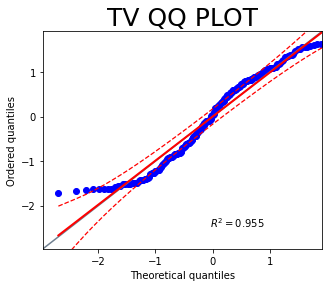

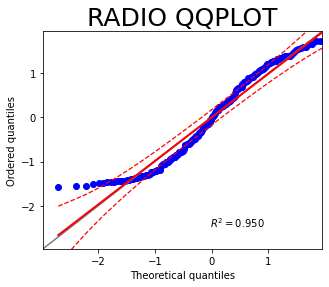

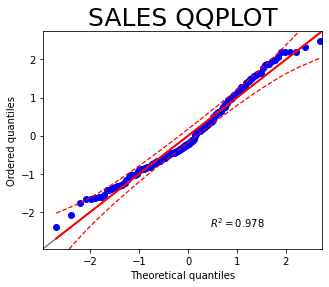

In [12]:
plt.figure(figsize=(15,25))
pg.qqplot(data['TV'])
plt.title("TV QQ PLOT",fontsize=25)
pg.qqplot(data['radio'])
plt.title("RADIO QQPLOT",fontsize=25)
pg.qqplot(data['sales'])
plt.title("SALES QQPLOT",fontsize=25)

 Radio and TV have high middle peak whereas sales is little right skewed.

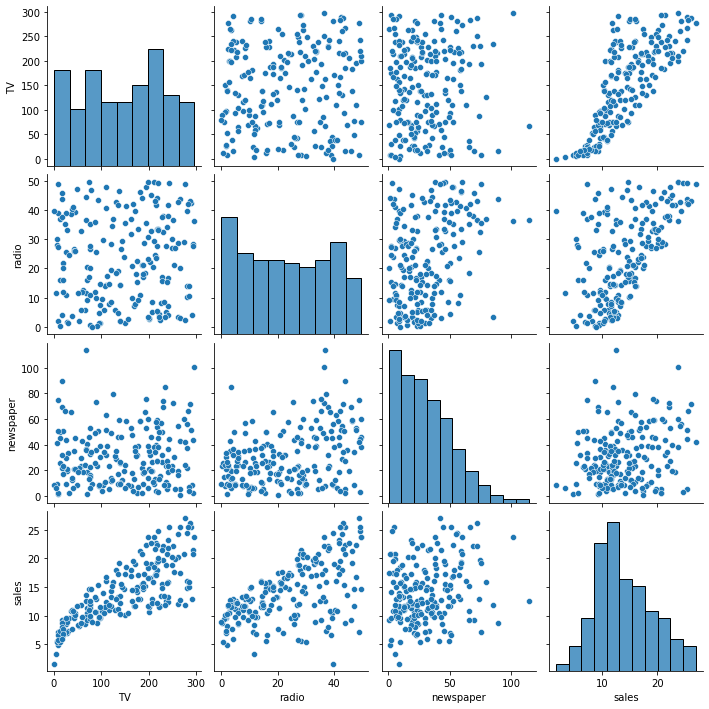

In [13]:
sns.pairplot(data)

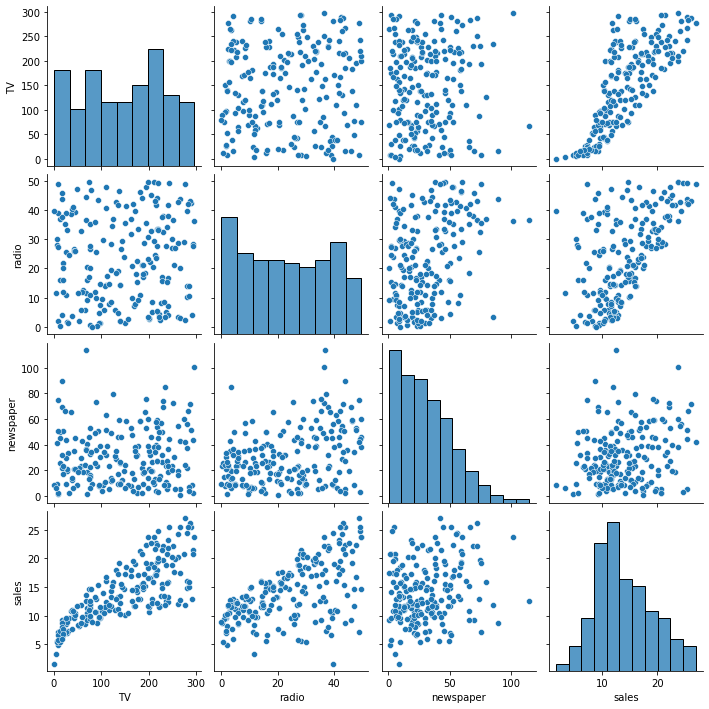

In [14]:
sns.pairplot(data)

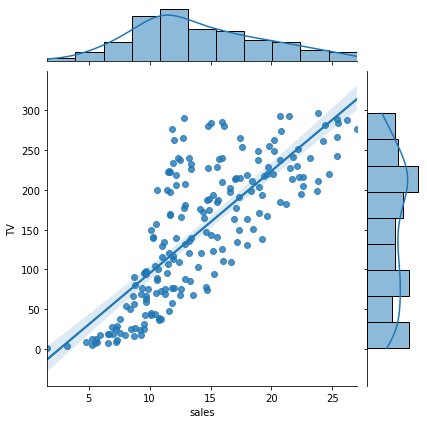

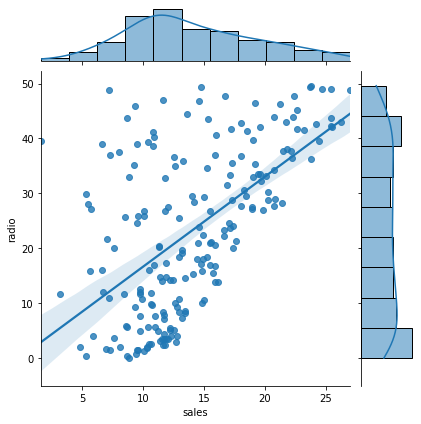

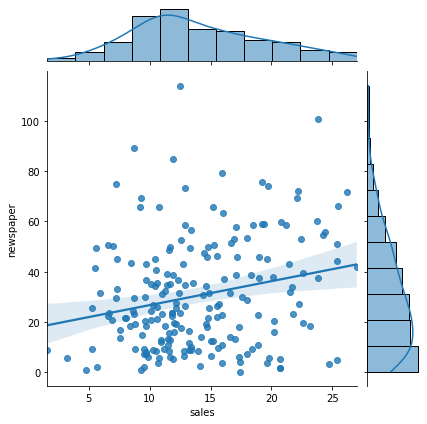

In [15]:
sns.jointplot(x='sales',y='TV',data=data,kind='reg')
sns.jointplot(x='sales',y='radio',data=data,kind='reg')
sns.jointplot(x='sales',y='newspaper',data=data,kind='reg')

In [16]:
!pip3 install plotly

In [17]:
import plotly.express as px
px.area(data,y='TV',x='sales')

Increasing the advertising on tv actually increasing the sales.

In [18]:
px.area(data,y='newspaper',x='sales')

Not effective change in sales due to newspaper.

In [19]:
px.area(data,y='radio',x='sales')

slight increase in sales due to radio advertisement.

# Multivariate Analysis

In [20]:
data.drop('newspaper',axis=1,inplace=True)

<AxesSubplot:>

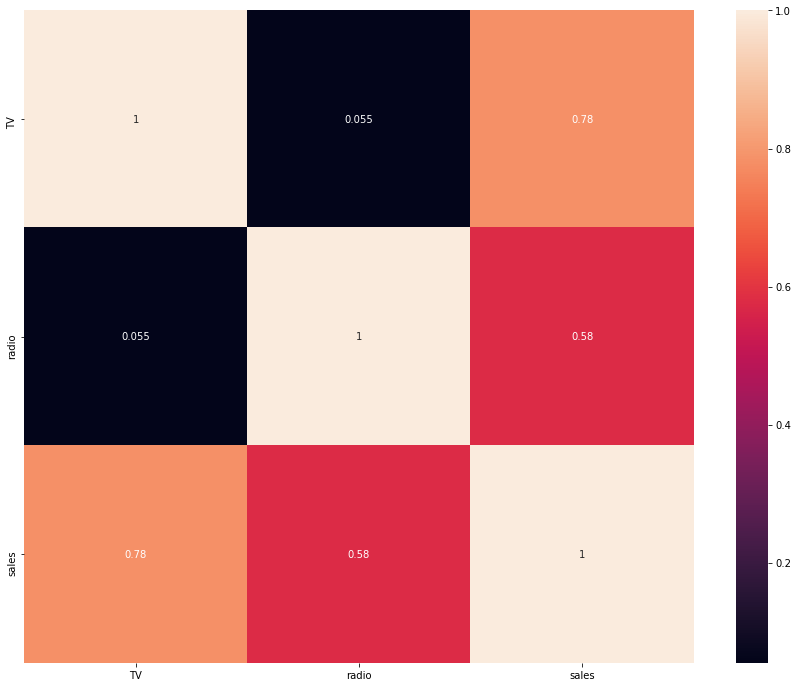

In [21]:
data_corr=data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(data_corr,annot=True)

# Checking skewness

In [22]:
data.skew()

TV      -0.069853
radio    0.094175
sales    0.407571
dtype: float64

# Checking Outliers

<AxesSubplot:xlabel='variable', ylabel='value'>

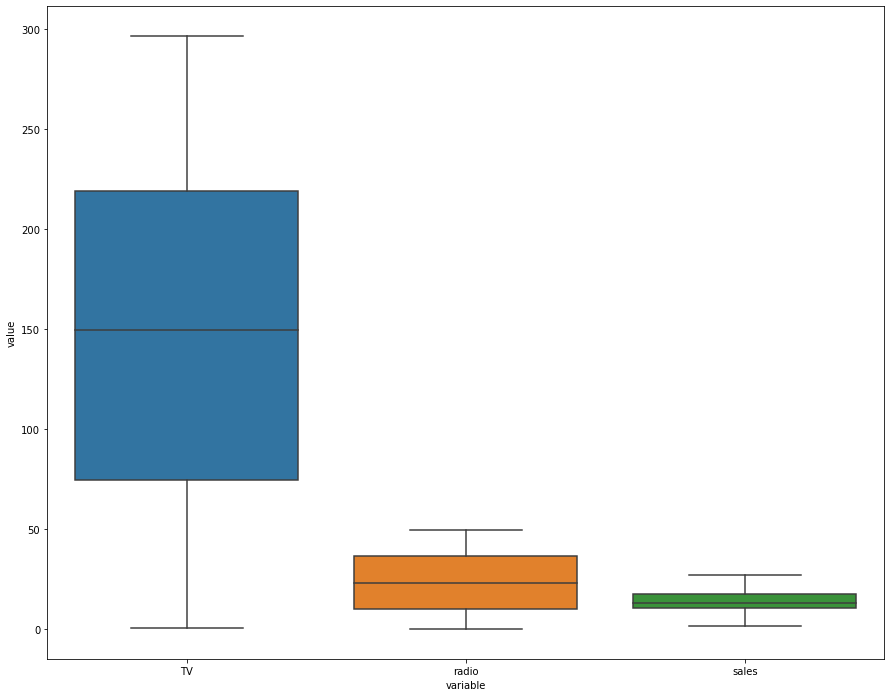

In [23]:
plt.figure(figsize=(15,12))
sns.boxplot(x='variable',y='value',data=pd.melt(data))

In [24]:
X=data.drop('sales',axis=1)
y=data['sales']

In [25]:
x=X

In [26]:
scaler=MinMaxScaler()
X_new=scaler.fit_transform(X)
x_new=pd.DataFrame(X_new,columns=x.columns)

Using minmax scaler to convert data into normal distribution and we use standard distribution when our data is normally distributed

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=42)

In [28]:
models={
    "LinearRegression":LinearRegression(),
    "DecisionTree":DecisionTreeRegressor(),
    "KNN":KNeighborsRegressor(),
    "RandomForest":RandomForestRegressor(),
    "ExtraTrees":ExtraTreesRegressor()
}

In [29]:
!pip install scikit-plot
import scikitplot as skplt

**************************************** LinearRegression **********************************************


Cross_Val_Score 0.889282957306453


Score 0.8656253548947073


MEAN_SQUARE_ERROR 1.3896065408465317e+20


MEAN_ABSOLUTE_ERROR 2536838119.679398


RMSE 11788157365.960686


MODEL PERFORMANCE CURVE


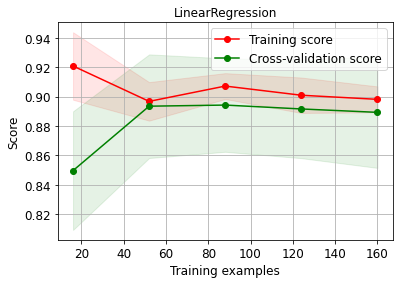

**************************************** DecisionTree **********************************************


Cross_Val_Score 0.9597803375606404


Score 0.9465780043844857


MEAN_SQUARE_ERROR 3.583616254321104e+19


MEAN_ABSOLUTE_ERROR 1798957981.9181404


RMSE 5986331309.175181


MODEL PERFORMANCE CURVE


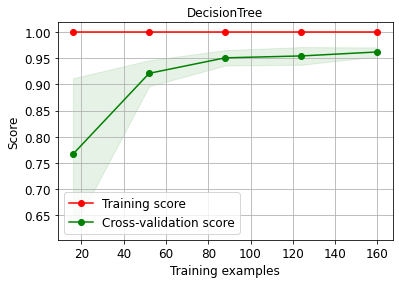

**************************************** KNN **********************************************


Cross_Val_Score 0.9664569127526399


Score 0.9631102564188646


MEAN_SQUARE_ERROR 4.263711875050473e+19


MEAN_ABSOLUTE_ERROR 1460021389.0926042


RMSE 6529710464.5232725


MODEL PERFORMANCE CURVE


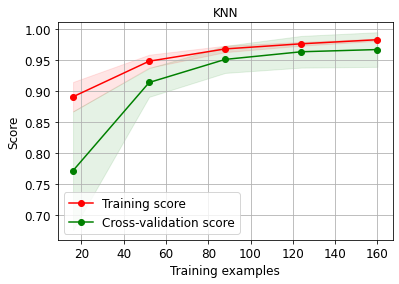

**************************************** RandomForest **********************************************


Cross_Val_Score 0.9777447487848612


Score 0.9845313608539218


MEAN_SQUARE_ERROR 2.806678326088676e+19


MEAN_ABSOLUTE_ERROR 1163695794.2912798


RMSE 5297809288.836921


MODEL PERFORMANCE CURVE


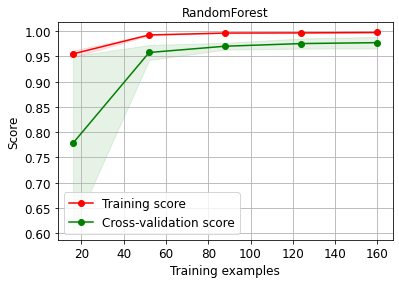

**************************************** ExtraTrees **********************************************


Cross_Val_Score 0.9880006654415261


Score 0.9859944447716855


MEAN_SQUARE_ERROR 1.0479115615147155e+20


MEAN_ABSOLUTE_ERROR 2074630356.6943855


RMSE 10236755157.347055


MODEL PERFORMANCE CURVE


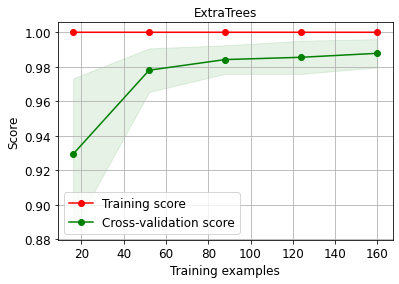

In [30]:
cvs=[]
Model=[]
score=[]
R2_score=[]
Mse=[]
Mae=[]
rmse=[]
for name,model in models.items():
  print("****************************************",name,"**********************************************")
  Model.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print("\n")
  cs=cross_val_score(model,X_new,y,cv=5,scoring='r2').mean()
  print("Cross_Val_Score",cs)
  cvs.append(cs*100)
  mse=mean_squared_error(np.exp(y_test),np.exp(y_pred))
  Mse.append(mse)
  print("\n")
  sc=model.score(X_test,y_test)
  score.append(sc)
  print("Score",sc)
  print("\n")
  print("MEAN_SQUARE_ERROR",mse)
  print("\n")
  mae=mean_absolute_error(np.exp(y_test),np.exp(y_pred))
  Mae.append(mae)
  print("MEAN_ABSOLUTE_ERROR",mae)
  print("\n")
  rmse=np.sqrt(mse)
  print("RMSE",rmse)
  print("\n")
  print("MODEL PERFORMANCE CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y,cv=5,scoring='r2',text_fontsize='large',title=name)
  plt.show()

# Hyperparameter Tuning

In [31]:
Trees=ExtraTreesRegressor()

In [32]:
param={
    "bootstrap":[True,False],
    "max_depth":[1,2,3,4,None],
    "min_samples_leaf":[1,2,3,4,None],
    "min_samples_split":[1,2,3,4,None],
    "max_leaf_nodes":[1,2,3,4,None],
    "n_estimators":[100,200,300,400,500]
}

In [33]:
grid=GridSearchCV(estimator=Trees,cv=5,n_jobs=-1,param_grid=param)

In [35]:
grid.fit(X_new,y)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, None],
                         'max_leaf_nodes': [1, 2, 3, 4, None],
                         'min_samples_leaf': [1, 2, 3, 4, None],
                         'min_samples_split': [1, 2, 3, 4, None],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [36]:
grid.best_score_

0.9880347088758409

In [37]:
grid.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [38]:
ETree=ExtraTreesRegressor(bootstrap= False,
                          max_depth= None,
                          max_leaf_nodes= None,
                          min_samples_leaf= 1,
                          min_samples_split= 3,
                          n_estimators= 500)

In [39]:
ETree.fit(X_train,y_train)
y_pred=ETree.predict(X_test)
print("MEAN_SQUARE_ERROR",mean_squared_error(y_test,y_pred))
print("ROOT_MEAN_SQUARE_ERROR",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MEAN_ABSOLUTE_ERROR",mean_absolute_error(y_test,y_pred))
print("R2_SCORE",r2_score(y_test,y_pred))

MEAN_SQUARE_ERROR 0.37530738366666977
ROOT_MEAN_SQUARE_ERROR 0.6126233619987649
MEAN_ABSOLUTE_ERROR 0.45024333333334
R2_SCORE 0.9862547970260208


# Final Model Learning Curve

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

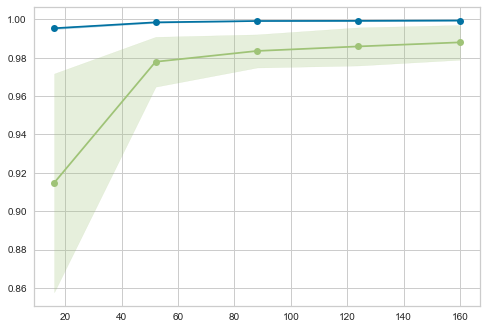

In [40]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(ETree,scoring='r2')
visualizer.fit(X_new,y)

In [41]:
import joblib
joblib.dump(grid,"Advertising.obj")

['Advertising.obj']

In [43]:
y_pred=model.predict(X_test)


In [44]:
r2_score(y_test,y_pred)


0.9859944447716855

In [45]:
pred_data=pd.DataFrame()
pred_data['Real_Values']=y_test
pred_data['predicted_by_model']=y_pred

In [46]:
pred_data

Real_Values  predicted_by_model
95          16.9              16.987
15          22.4              22.181
30          21.4              20.764
158          7.3               6.052
128         24.7              23.956
115         12.6              12.815
69          22.3              22.796
170          8.4               9.392
174         11.5              11.695
45          14.9              15.456
66           9.5               8.835
182          8.7               8.759
165         11.9              12.074
78           5.3               3.615
186         10.3              10.397
177         11.7              12.541
56           5.5               4.473
152         16.6              16.674
82          11.3              11.350
68          18.9              18.759
124         19.7              20.358
16          12.5              12.567
148         10.9              10.776
93          22.2              22.212
65           9.3               9.618
60           8.1               8.802
84          21.7              22.823
67          13.4              12.160
125         10.6              10.524
132          5.7               4.908
9           10.6              11.360
18          11.3              11.231
55          23.7              22.738
75           8.7               9.093
150         16.1              15.820
104         20.7              20.861
135         11.6              11.572
137         20.8              20.506
164         11.9              12.111
76           6.9               7.281
79          11.0              11.178
197         12.8              12.748
38          10.1               9.772
24           9.7               9.782
122         11.6              11.734
195          7.6               8.285
29          10.5              10.626
19          14.6              14.923
143         10.4              10.326
86          12.0              11.987
114         14.6              14.502
173         11.7              12.415
5            7.2               5.854
126          6.6               4.907
117          9.4               8.916
73          11.0              11.243
140         10.9              10.914
98          25.4              25.918
172          7.6               6.870
96          11.7              11.458